## Some context

 - dataset contains transactions from September 2013 in Europe
 - highly unbalanced
 - features V_1, V_2, ..., V_28 obtained from PCA
 - feature 'Time' = delta of time elapsed from the first transaction

# Project Setup

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 1337

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # using a 3 decimal format
df = pd.read_csv("../creditcard.csv")  # read the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


# Data exploration

We can observe that V_1 through V_28 have been scaled

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [4]:
df.isnull().sum().max()

0

In [5]:
df['Class'].value_counts()[1]/len(df)*100

0.1727485630620034

We can already observe some things:

- most transactions are quite small, the mean of 'Amount' is only 88 USD
- no nulls in the dataset
- fraudulent transactions are only about 0.17%

Text(0.5, 1.0, '0: No Fraud || 1: Fraud')

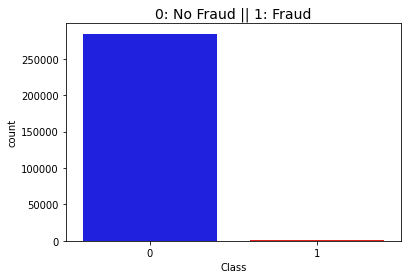

In [6]:
sns.countplot('Class', data=df, palette=['blue', 'red'])
plt.title('0: No Fraud || 1: Fraud', fontsize=14)

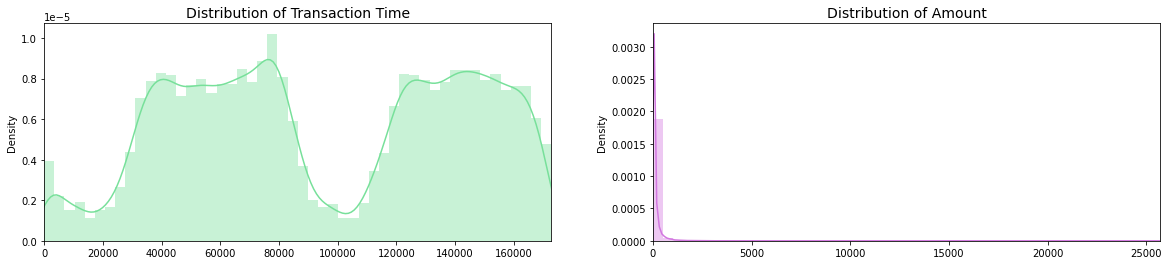

In [7]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

time_val = df['Time'].values
axes[0] = sns.distplot(time_val, color='#77e09a', ax=axes[0])
axes[0].set_title('Distribution of Transaction Time', fontsize=14)
axes[0].set_xlim([min(time_val), max(time_val)])

amount_vals = df['Amount'].values
axes[1] = sns.distplot(amount_vals, color='#d277e0', ax=axes[1])
axes[1].set_title('Distribution of Amount', fontsize=14)
axes[1].set_xlim([min(amount_vals), max(amount_vals)])

plt.show()

# Under-sampling
We want to obtain 50/50 distribution because our original dataset will be prone to overfitting

In [8]:
from sklearn.preprocessing import RobustScaler

# we can observe above there are many outliers to the Amount feature

scaler = RobustScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.insert(0, "scaled_time", scaled_time)
df.insert(1, "scaled_amount", scaled_amount)
df.drop(["Time", "Amount"], axis=1, inplace=True)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.995,1.783,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,...,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,-0.995,-0.270,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,...,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,-0.995,4.984,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,...,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,-0.995,1.418,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,...,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,-0.995,0.671,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,...,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


In [9]:
# we shuffle in order to ensure randomness, Time feature might be sensitive to ordering
df = df.sample(frac=1)

df_fraud = df.loc[df["Class"] == 1]
df_no_fraud = df.loc[df["Class"] == 0][:492]

concat_df = pd.concat([df_fraud, df_no_fraud])

new_df = concat_df.sample(frac=1, random_state=RANDOM_STATE)  # reshuffle
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
150678,0.108,0.116,-13.087,7.352,-18.257,10.649,-11.731,-3.659,-14.874,8.810,...,-1.376,2.761,-0.266,-0.413,0.520,-0.744,-0.168,-2.498,-0.711,1
223067,0.688,-0.226,1.929,-0.100,-0.258,1.583,-0.371,-0.281,-0.216,-0.039,...,-0.273,-0.514,-1.144,0.441,-0.085,-0.317,-1.104,0.062,-0.030,0
10498,-0.793,-0.252,-0.469,1.111,2.041,1.732,0.135,-0.094,0.266,0.083,...,-0.359,0.159,0.593,-0.054,0.321,-0.369,-0.137,-0.101,0.039,1
150677,0.108,0.116,-13.087,7.352,-18.257,10.649,-11.731,-3.659,-14.874,8.810,...,-1.376,2.761,-0.266,-0.413,0.520,-0.744,-0.168,-2.498,-0.711,1
41569,-0.516,-0.293,-2.378,0.521,-8.094,8.005,2.641,-3.382,-1.934,0.562,...,-0.635,0.148,0.721,2.661,-0.509,-0.402,0.588,0.500,0.552,1


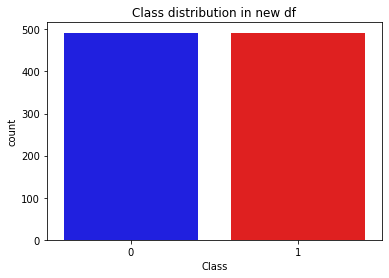

In [10]:
sns.countplot("Class", data=new_df, palette=["blue", "red"])
plt.title("Class distribution in new df")
plt.show()

Next, we are going to look at correlation matrices to analyze which features

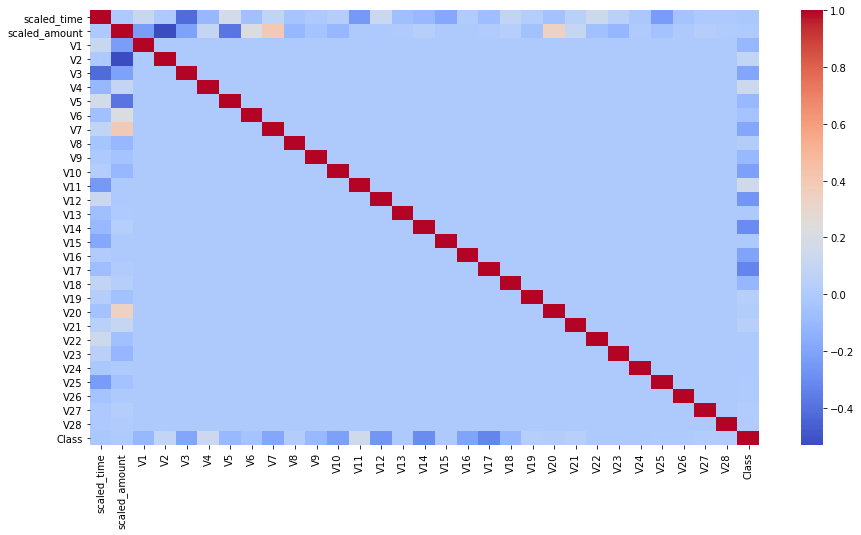

In [11]:
# corr mat for initial df

corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':20}, ax=ax)

plt.show()

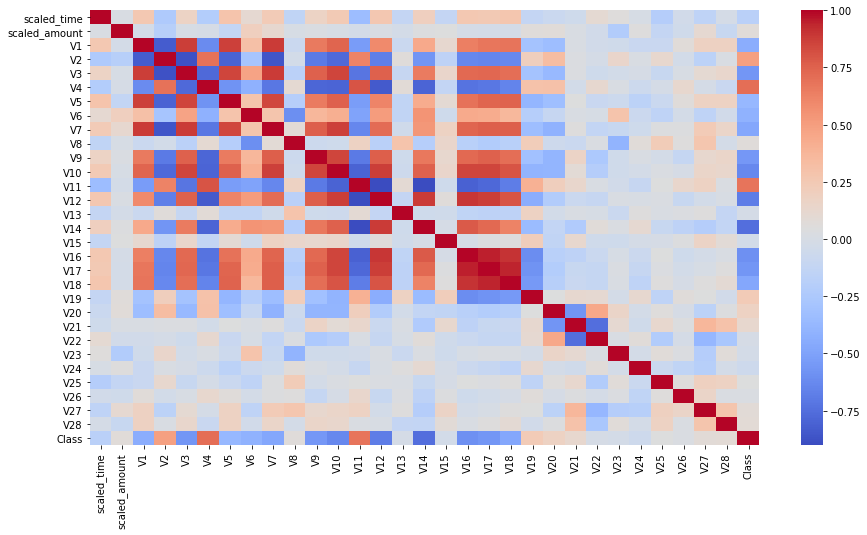

In [12]:
# corr mat for initial df

corr = new_df.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':20}, ax=ax)

plt.show()

We can observe correlations for the following features:
 - *Positive Correlations*: V2, V4, V11, V19
 - *Negative Correlations*: V3, V10, V12, V14

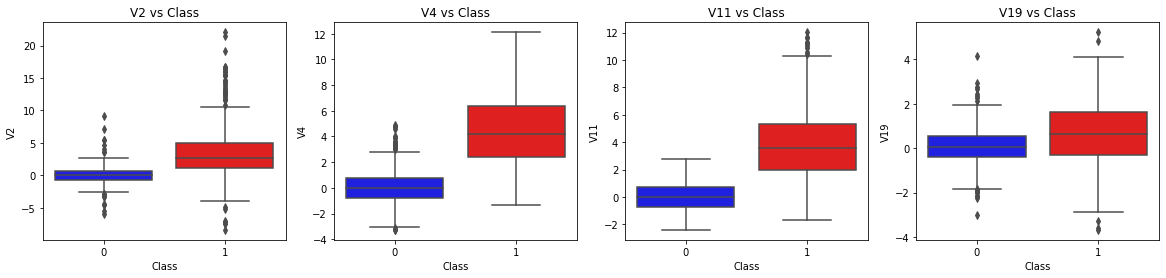

In [13]:
# Positive corr
f, axes = plt.subplots(ncols=4, figsize=(20,4))
features_to_plot_pos = ["V2", "V4", "V11", "V19"]

for index, feat in enumerate(features_to_plot_pos):
    sns.boxplot(x="Class", y=feat, data=new_df, palette=["blue", "red"], ax=axes[index])
    axes[index].set_title(f"{feat} vs Class")

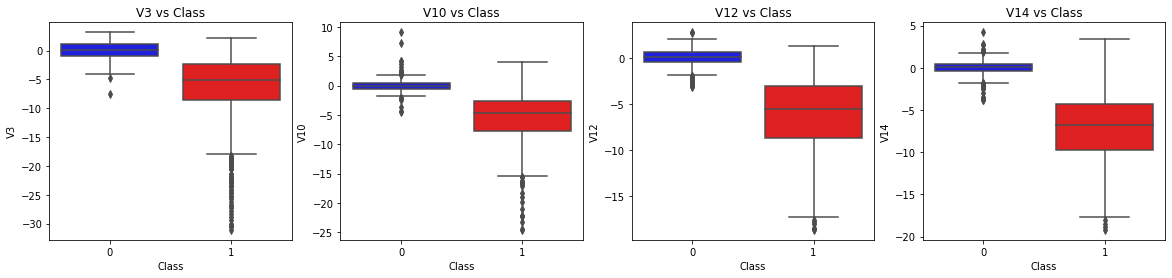

In [14]:
# Negative corr
f, axes = plt.subplots(ncols=4, figsize=(20, 4))
features_to_plot_neg = ["V3", "V10", "V12", "V14"]

for index, feat in enumerate(features_to_plot_neg):
    sns.boxplot(x="Class", y=feat, data=new_df, palette=["blue", "red"], ax=axes[index])
    axes[index].set_title(f"{feat} vs Class")

Let's take a look at the distribution of these features

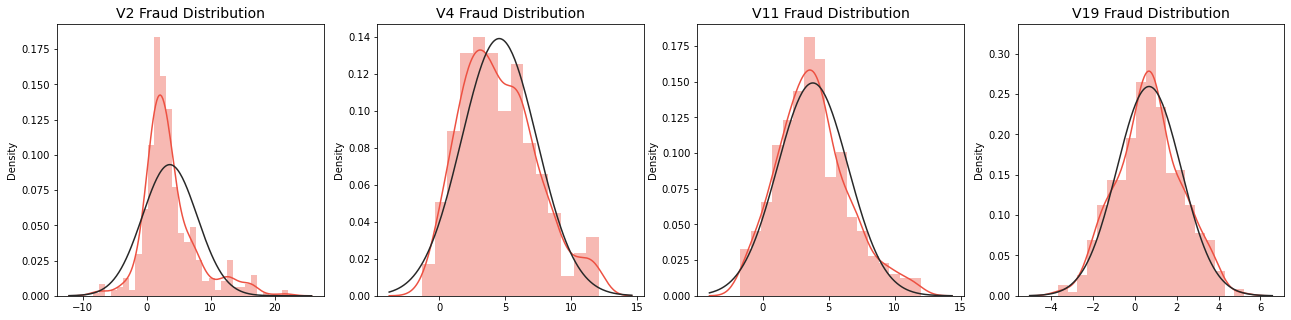

In [15]:
from scipy.stats import norm

f, axes = plt.subplots(ncols=4, figsize=(22, 5))

for index, feat in enumerate(features_to_plot_pos):
    dist = new_df[feat].loc[new_df['Class'] == 1].values
    sns.distplot(dist, ax=axes[index], fit=norm, color="#ed5142")
    axes[index].set_title(f"{feat} Fraud Distribution", fontsize=14)

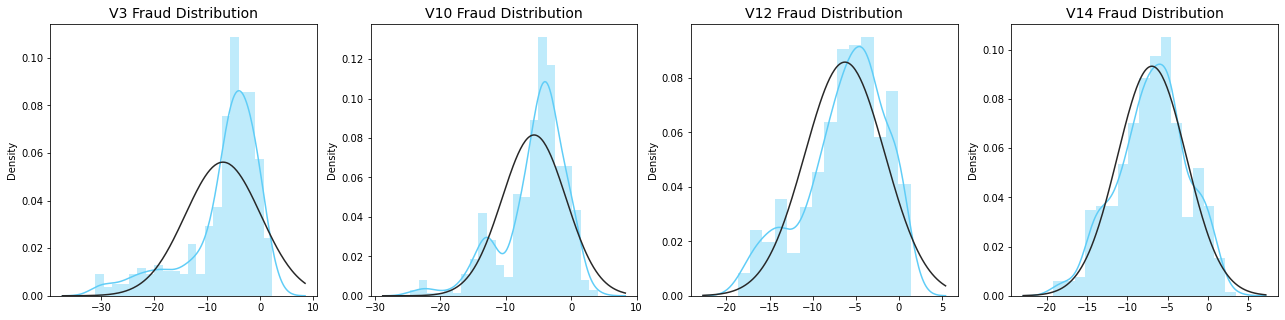

In [16]:
from scipy.stats import norm

f, axes = plt.subplots(ncols=4, figsize=(22, 5))

for index, feat in enumerate(features_to_plot_neg):
    dist = new_df[feat].loc[new_df['Class'] == 1].values
    sns.distplot(dist, ax=axes[index], fit=norm, color="#60cdf7")
    axes[index].set_title(f"{feat} Fraud Distribution", fontsize=14)

# Outliner detection

We eliminate values that are 1.5x times lower/higher than the inter quantile range

In [17]:
print("Size before trimming: ", new_df.shape[0])

for index, feat in enumerate(features_to_plot_neg + features_to_plot_pos):
    frauds = new_df[feat].loc[new_df["Class"] == 1].values
    q25, q75 = np.percentile(frauds, 25), np.percentile(frauds, 75)
    iqr = q75 - q25
    cut = iqr * 1.5
    low, up = q25 - cut, q75 + cut
    outliers = [x for x in frauds if x < low or x > up]
    # print(f"Outliers found for {feat}: ", len(outliers))
    new_df = new_df.drop(new_df[(new_df[feat]<low) | (new_df[feat]>up)].index)

print("Size after trimming: ", new_df.shape[0])

Size before trimming:  984
Size after trimming:  835


# Clustering

We are going to plot t-SNE and PCA in order to see how classification will perform

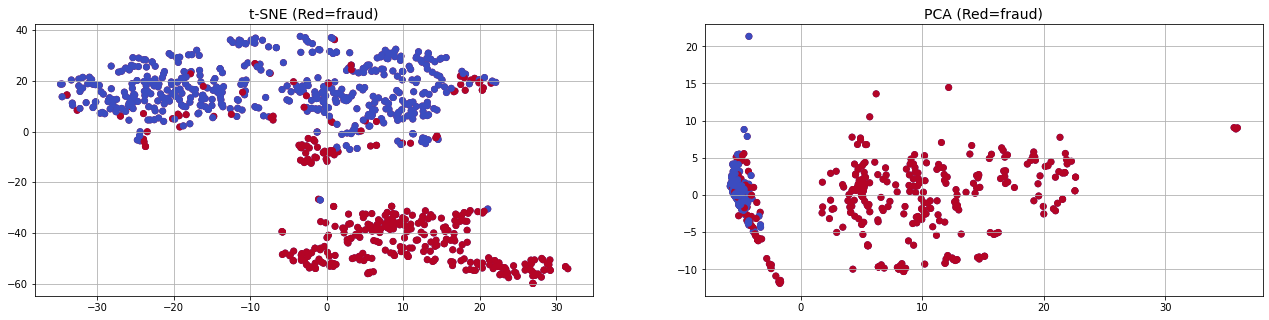

In [18]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = new_df.drop("Class", axis=1)
y = new_df["Class"]

X_tSNE = TSNE(random_state=RANDOM_STATE).fit_transform(X.values)
X_PCA = PCA(random_state=RANDOM_STATE).fit_transform(X.values)

f, axes = plt.subplots(ncols=2, figsize=(22, 5))

axes[0].scatter(X_tSNE[:, 0], X_tSNE[:, 1], c=(y == 0), cmap="coolwarm", label="Not fraud")
axes[0].scatter(X_tSNE[:, 0], X_tSNE[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud")
axes[0].set_title("t-SNE (Red=fraud)", fontsize=14)

axes[1].scatter(X_PCA[:, 0], X_PCA[:, 1], c=(y == 0), cmap="coolwarm", label="Not fraud")
axes[1].scatter(X_PCA[:, 0], X_PCA[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud")
axes[1].set_title("PCA (Red=fraud)", fontsize=14)

for ax in axes:
    ax.grid(True)

We can observe that both algorithm obtained clearly defined clusters

# Classification

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [20]:
from sklearn.model_selection import cross_val_score

# we perform cross validation not accuracy because we are dealing with imbalanced data
print("Cross validation scores:")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"\t{key}: ", round(score.mean()*100, 2), "%")

Cross validation scores:
	Logistic Regression:  93.61 %
	K Nearest Neighbors:  93.14 %
	Support Vector:  93.62 %
	Decision Tree:  88.66 %


In [21]:
# we perform grid search in order to find best params for these 4 models

from sklearn.model_selection import GridSearchCV

classifier_params = {
    "Logistic Regression": { "penalty": ["l1", "l2", "elasticnet"], "C": [0.01, 0.1, 1, 10, 100]},
    "K Nearest Neighbors": { "n_neighbors": list(range(2, 6)), "weights":["uniform", "distance"], "algorithm": ["ball_tree", "kd_tree", "brute"]},
    "Support Vector": { "kernel": ["rbf", "poly", "sigmoid"], "C": [0.1, 0.5, 0.8, 1, 5, 10]},
    "Decision Tree": { "criterion": ["gini","entropy"], "max_depth": list(range(4, 8))},
}

best_estimators = {}

print("Best parameters:")
for key, classifier in classifiers.items():
    cls_ = GridSearchCV(classifier, classifier_params[key])
    cls_.fit(X_train, y_train)
    best_estimators[key] = cls_.best_estimator_
    print(f"\t{key}: ", cls_.best_params_)

print("Cross validation scores after param optimizations:")
for key, estimator in best_estimators.items():
    score = cross_val_score(estimator, X_train, y_train, cv=5)
    print(f"\t{key}: ", round(score.mean() * 100, 2), "%")


Best parameters:
	Logistic Regression:  {'C': 1, 'penalty': 'l2'}
	K Nearest Neighbors:  {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}
	Support Vector:  {'C': 5, 'kernel': 'rbf'}
	Decision Tree:  {'criterion': 'entropy', 'max_depth': 4}
Cross validation scores after param optimizations:
	Logistic Regression:  93.61 %
	K Nearest Neighbors:  93.93 %
	Support Vector:  94.25 %
	Decision Tree:  91.86 %


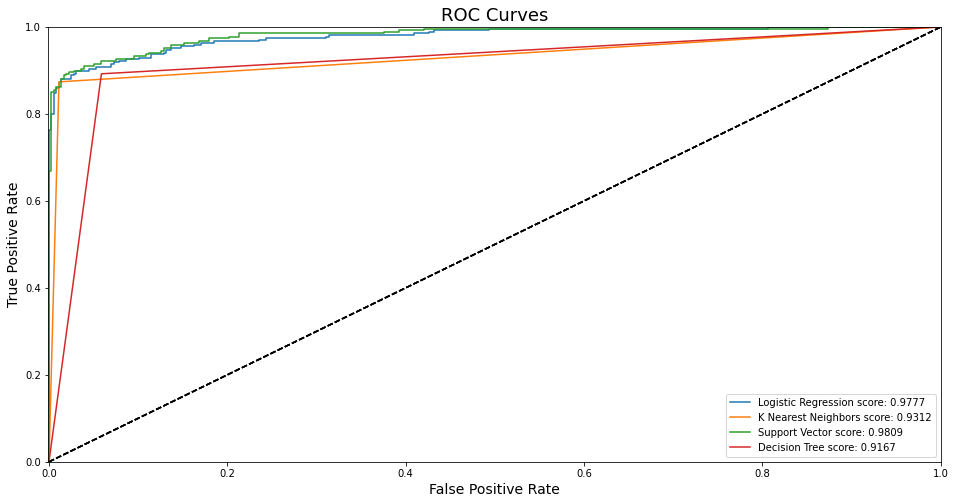

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict


plt.figure(figsize=(16, 8))
plt.title("ROC Curves", fontsize=18)

for key, estimator in best_estimators.items():
    method = "predict"
    if key == "Logistic Regression" or key == "Support Vector":
        method = "decision_function"
    prediction = cross_val_predict(estimator, X_train, y_train, cv=5, method=method)
    fpr, tpr, thresholds  = roc_curve(y_train, prediction)
    plt.plot(fpr, tpr, label=f"{key} score: {roc_auc_score(y_train, prediction):.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.001, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)

plt.legend()
plt.show()

Accuracy score obtained: 0.9091


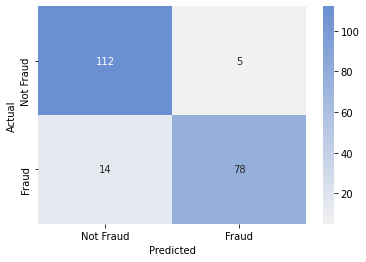

In [23]:
# we will use the logistic regressor because it performed better consistently

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = best_estimators["Logistic Regression"].predict(X_test)
print(f"Accuracy score obtained: {accuracy_score(y_test, y_pred):.4f}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g",
            cmap=sns.light_palette("#6b90d1", as_cmap=True),
            xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["Not Fraud", "Fraud"],
        )
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.89      0.10       492

    accuracy                           0.97    284807
   macro avg       0.53      0.93      0.54    284807
weighted avg       1.00      0.97      0.98    284807



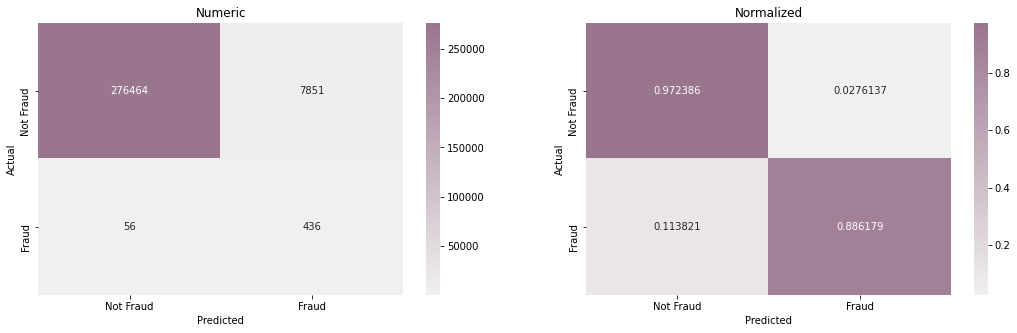

In [24]:
# test on the complete df

from sklearn.metrics import classification_report

final_pred = best_estimators["Logistic Regression"].predict(df.drop("Class", axis=1))
target = df["Class"]


def plot_norm_heatmap(test, pred, color):
    f, axes = plt.subplots(ncols=2, figsize=(18, 5))
    print(classification_report(test, pred))
    sns.heatmap(confusion_matrix(test, pred), annot=True, fmt="g", ax=axes[0],
                cmap=sns.light_palette(color, as_cmap=True),
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"],
            )
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title("Numeric")

    sns.heatmap(confusion_matrix(test, pred, normalize="true"), annot=True, fmt="g", ax=axes[1],
                cmap=sns.light_palette(color, as_cmap=True),
                xticklabels=["Not Fraud", "Fraud"],
                yticklabels=["Not Fraud", "Fraud"],
            )
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].set_title("Normalized")

plot_norm_heatmap(target, final_pred, "#9a758e")

plt.show()

## Random Forest

In [25]:
df_features = df.drop("Class", axis=1)
df_target = df["Class"]

# we shuffle values and also stratify the target, meaning we want to keep the distribution of the target class
train_X, test_X, train_y, test_y = train_test_split(df_features, df_target, test_size=0.25, random_state=RANDOM_STATE, shuffle=True, stratify=df_target)
train_X, valid_X, train_y, valid_y= train_test_split(train_X, train_y, test_size=0.25, random_state=RANDOM_STATE, shuffle=True, stratify=train_y)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# we've set here the number of parallel jobs to use all CPUs
rfc = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)

In [27]:
rfc.fit(train_X, train_y)

RandomForestClassifier(n_jobs=-1, random_state=1337)

In [28]:
rfc_pred = rfc.predict(valid_X)

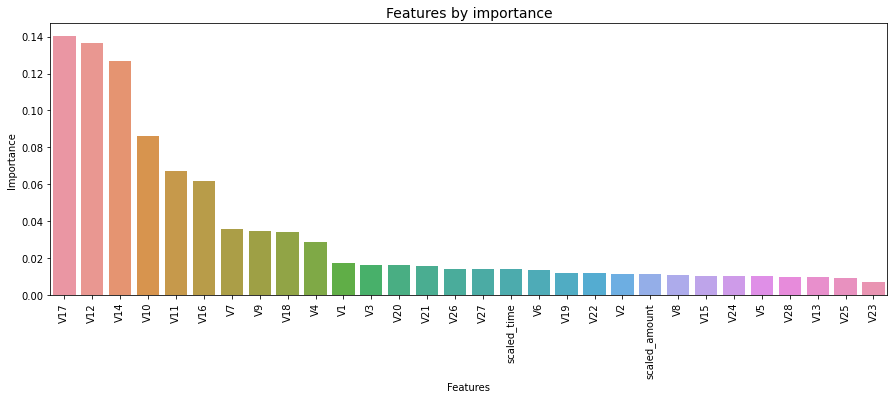

In [29]:
def plot_importance(classifier):
    imp_df = pd.DataFrame({"Features": train_X.columns, "Importance": classifier.feature_importances_})
    imp_df = imp_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(15, 5))
    plt.title("Features by importance", fontsize=14)
    s = sns.barplot(x="Features", y="Importance", data=imp_df)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)

plot_importance(rfc)
plt.show()

We can observe that our Random Forest Classifier gave quite high importance to some of the same features we previously found in our under sampling approach

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53310
           1       0.96      0.80      0.88        92

    accuracy                           1.00     53402
   macro avg       0.98      0.90      0.94     53402
weighted avg       1.00      1.00      1.00     53402



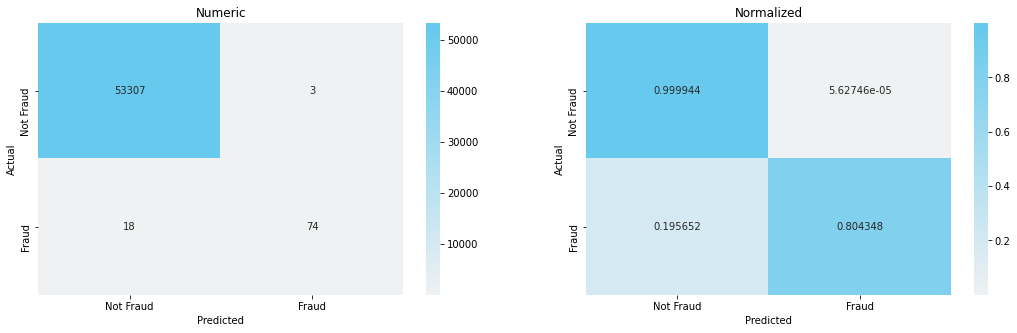

In [30]:
plot_norm_heatmap(valid_y, rfc_pred, "#66c9ed")

In [31]:
roc_auc_score(valid_y, rfc_pred)

0.9021457757334052

## CatBoost

In [32]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=500,
                        eval_metric='AUC',
                        random_seed=RANDOM_STATE,
                        metric_period=50)

In [33]:
cbc.fit(train_X, train_y, verbose=True)

Learning rate set to 0.16997
0:	total: 170ms	remaining: 1m 24s
50:	total: 1.17s	remaining: 10.3s
100:	total: 2.3s	remaining: 9.1s
150:	total: 3.22s	remaining: 7.44s
200:	total: 4.16s	remaining: 6.18s
250:	total: 5.04s	remaining: 5s
300:	total: 6.17s	remaining: 4.08s
350:	total: 7.21s	remaining: 3.06s
400:	total: 8.13s	remaining: 2.01s
450:	total: 8.99s	remaining: 977ms
499:	total: 9.86s	remaining: 0us


In [34]:
cbc_pred = cbc.predict(valid_X)

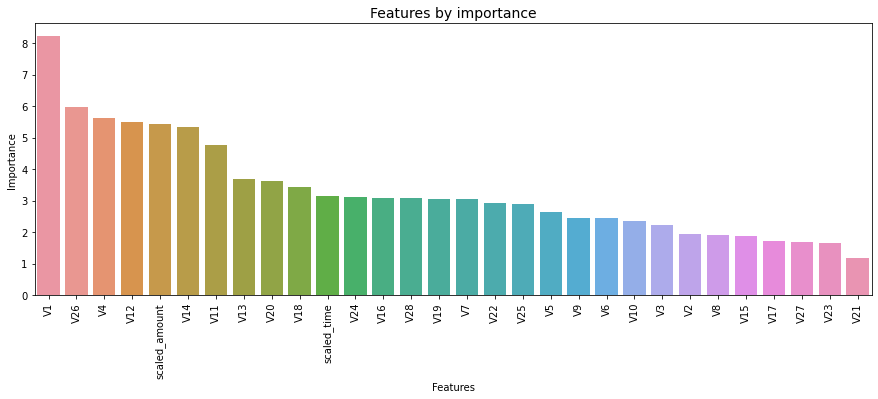

In [35]:
plot_importance(cbc)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53310
           1       0.97      0.82      0.89        92

    accuracy                           1.00     53402
   macro avg       0.99      0.91      0.94     53402
weighted avg       1.00      1.00      1.00     53402



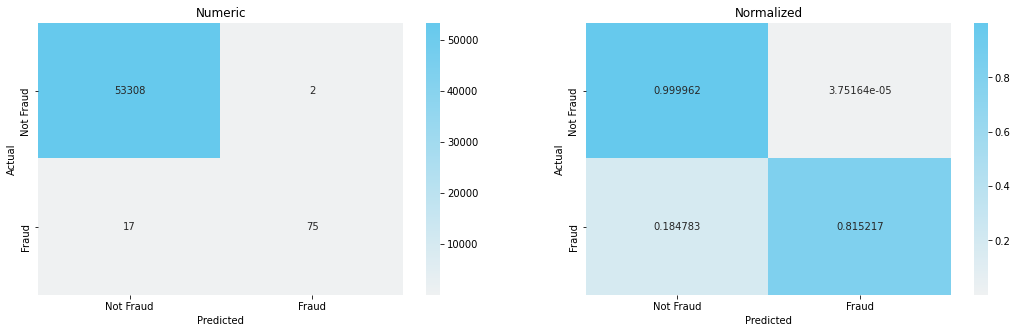

In [36]:
plot_norm_heatmap(valid_y, cbc_pred, "#66c9ed")

In [37]:
roc_auc_score(valid_y, cbc_pred)

0.9075899374454584

## XGBoost

In [38]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_X, train_y)
dvalid = xgb.DMatrix(valid_X, valid_y)
dtest = xgb.DMatrix(test_X, test_y)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['silent'] = True
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [39]:
model = xgb.train(params,
                dtrain,
                1000,
                watchlist,
                early_stopping_rounds=50,
                maximize=True,
                verbose_eval=50)

[13:19:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.91506	valid-auc:0.92925
[50]	train-auc:0.99861	valid-auc:0.97374
[83]	train-auc:0.99820	valid-auc:0.97674


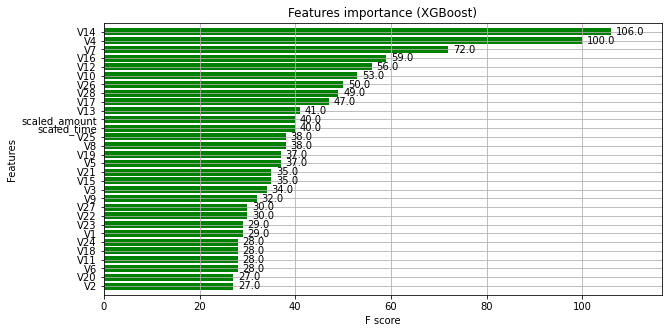

In [40]:
fig, (ax) = plt.subplots(ncols=1, figsize=(10,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green")
plt.show()

Again we can observe some of the same features we found relevant when doing under sampling

In [41]:
preds = model.predict(dtest)

In [42]:
roc_auc_score(test_y, preds)

0.9823881980853322

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.79      0.87       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



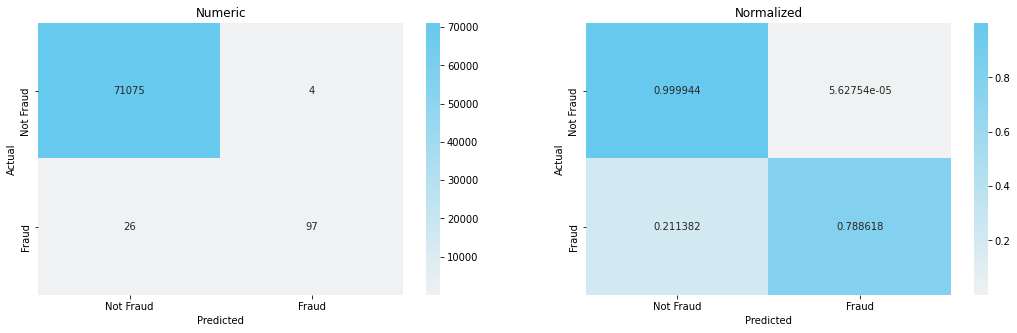

In [43]:
plot_norm_heatmap(test_y.values, preds.round(), "#66c9ed")

## Conclusions

We can try to summarize the results obtained so far. We tried under sampling with some of the most well known models and ensemble methods on the whole dataset with some of the most powerful algorithms, which to be fair could use some more optimizations.

The most important thing to note is that we need to be very careful when evaluating the performance of algorithms when dealing with imbalanced datasets.
If we were to use just one metric, such as accuracy or AUC-ROC scores, we might be mislead as to how accurate our models really are in making the predictions.

In the ideal case we want to be able to detect as many frauds as possible with as little as possible miss classifications (imagine being denied transactions because the bank's algorithm decided that you are committing a crime while buying groceries).

The most important metric for imbalanced data is the **recall** *(TP / TP+FN)* because it measures how many frauds we were able to detect out of the actual total number of frauds.
If we used ROC AUC scores only, we would be mislead into thinking that XGBoost had the best performance but it consistently had lower recall than our other ensemble methods (RandomForest and CatBoost).
Our logistic regressor had the best recall but it comes at the cost of mislabeling non-frauds (about 10.000x times more; CatBoost FP:0.000037, LGR FP: 0.027), in the real world this could lead to maybe thousands of complains.

**CatBoost** seemed to offer the best trade-off between detecting actual frauds and mislabeling honest transactions.